# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

K=1, MSE=5.097164663600808e-07
K=3, MSE=6.165579999891086e-07
K=5, MSE=1.1140571000301021e-06
K=7, MSE=1.327144019408752e-06
K=9, MSE=1.675617718909227e-06

Best K value: 1 with MSE=0.0000


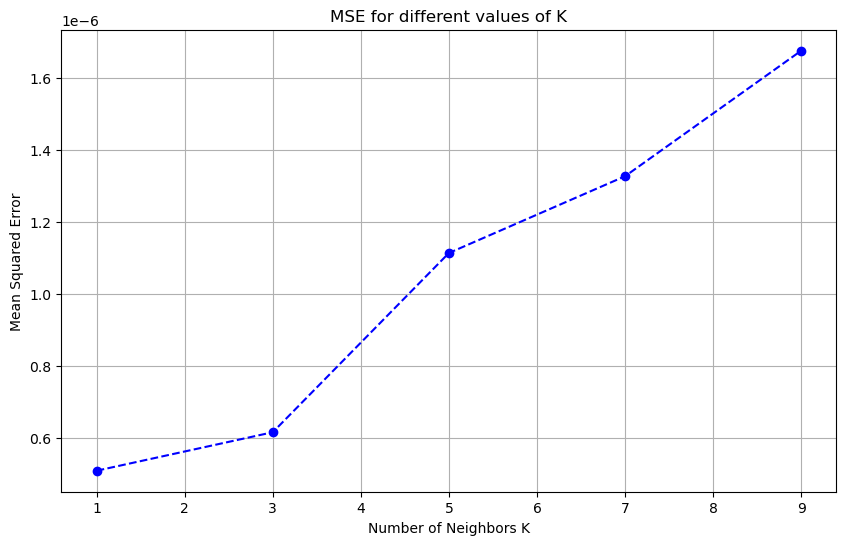

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)
data = np.random.rand(1000, 1) * 100 

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data_normalized, data_normalized, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 9]
errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)
    print(f"K={k}, MSE={mse}")

best_k = k_values[np.argmin(errors)]
print(f"\nBest K value: {best_k} with MSE={min(errors)}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Squared Error')
plt.title('MSE for different values of K')
plt.grid(True)
plt.show()
